# 決定木
## CART
## Gini inpurity

In [1]:
class binaryTree(object):
    def __init__(self, root=None, parent=None):
        self.root = root
        self.left = None
        self.right = None
        self.parent = parent
        
    def putLeft(self, val):
        if(self.left is None):
            self.left = binaryTree(root=val, parent=self)
    
    def putRight(self, val):
        if(self.right is None):
            self.right = binaryTree(root=val, parent=self)
    
    def putRoot(self, val):
        self.root = val
    
    def getRoot(self):
        return self.root
    
    def getLeft(self):
        return self.left
    
    def getRight(self):
        return self.right
    
    def getDepth(self):
        depth = 0
        if(self.root is not None):
            depth += 1
            leftDepth = self.left.getDepth() if self.left is not None else 0
            rightDepth = self.right.getDepth() if self.right is not None else 0
            depth += max(leftDepth, rightDepth)
        return depth
    
    def getLeafNum(self):
        count = 0
        if(self.root is not None):
            count += 1
        count += self.getLeftLeafNum()
        count += self.getRightLeafNum()
        return count
        
    def getLeftLeafNum(self):
        count = 0
        if(self.left is not None):
            count += self.left.getLeafNum()
        return count
        
    def getRightLeafNum(self):
        count = 0
        if(self.right is not None):
            count += self.right.getLeafNum()
        return count

    def getMyDepth(self):
        depth = 1
        if(self.parent is not None):
            depth += self.parent.getMyDepth()
        return depth
        
    def getParents(self):
        parent = self.parent
        l = list()
        while(parent is not None):
            l.append(parent.root)
            parent = parent.parent
        return [i for i in reversed(l)]
        
bt = binaryTree()
ll = range(10)
bt.putRoot(0)
bt.putLeft(1)
bt.putRight(2)
bt.left.putLeft(3)
bt.left.putRight(4)
bt.right.putRight(5)
bt.left.left.putLeft(6)
bt.left.left.left.putLeft(9)
bt.right.right.putLeft(7)
bt.right.right.putRight(8)
print(bt.getLeafNum())
print(bt.getDepth())

print(bt.getMyDepth())
print(bt.left.getMyDepth())
print(bt.left.left.getMyDepth())
print(bt.left.left.left.getMyDepth())
newbt = bt.left.left
print(newbt.getMyDepth())
print(newbt.getDepth())

print(newbt.getParents())
print(bt.right.getParents())
print(bt.right.right.getParents())

10
5
1
2
3
4
3
3
[0, 1]
[0]
[0, 2]


(300, 2)
(300,)
(300, 3) and 1 and 
row: 1 thresh: 0.1370773011349281
(154, 3) and 2 and left
row: 0 thresh: -2.5312000009526265
(152, 3) and 3 and left
row: 1 thresh: 0.6406059971572029
(131, 3) and 4 and left
row: 1 thresh: 0.8037754148153303
(119, 3) and 5 and left
(12, 3) and 5 and right
(21, 3) and 4 and right
row: 0 thresh: -0.711064644821042
(4, 3) and 5 and left
(17, 3) and 5 and right
(2, 3) and 3 and right
row: 0 thresh: -3.558006543209242
(1, 3) and 4 and left
(1, 3) and 4 and right
(146, 3) and 2 and right
row: 1 thresh: 0.002012543176049153
(6, 3) and 3 and left
row: 0 thresh: -1.944242923737041
(2, 3) and 4 and left
row: 0 thresh: -1.7698699550258299
(1, 3) and 5 and left
(1, 3) and 5 and right
(4, 3) and 4 and right
row: 0 thresh: -3.150455906294558
(3, 3) and 5 and left
(1, 3) and 5 and right
(140, 3) and 3 and right
row: 0 thresh: -1.13838803315322
(105, 3) and 4 and left
row: 0 thresh: -1.0967146231719294
(104, 3) and 5 and left
(1, 3) and 5 and right
(35, 3) and 4 an

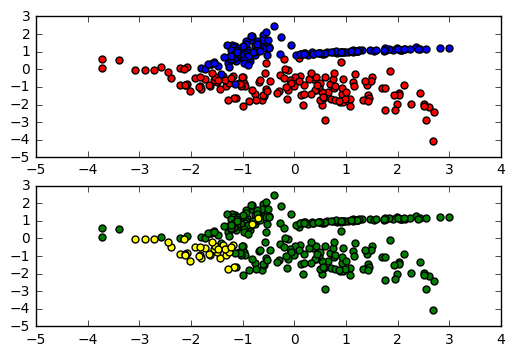

In [95]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import copy
from operator import itemgetter
from abc import ABCMeta
from collections import Counter


class dtNode():
    def __init__(self):
        self.row = None
        self.thresh = None
        self.myclass = None
        self.informationGain = None
        self.side = None
        self.isDead = False
    
    def isTrained(self):
        return (self.row is not None) and (self.thresh is not None)
    
    def split(self, data):
        if(self.isTrained()):
            left = data[data[:, self.row] >= self.thresh]
            right = data[data[:, self.row] < self.thresh]
        return (left, right)
    
    def getBestSplit(self, data):
        self.informationGain = None
        for iter in range(data.shape[1] - 1):
            sortedData = data[data[:, iter].argsort(), :]
            for jter in range(data.shape[0] - 1):
                left = sortedData[0: jter + 1]
                right = sortedData[jter + 1:]
                targetScore = self.calcInformationGain(sortedData, left, right)
                if(self.informationGain is None) or (targetScore > self.informationGain):
                    self.informationGain = targetScore
                    self.thresh = (left[-1, iter] + right[0, iter]) / 2.0
                    self.row = iter
                    left, right = self.split(data)
                    if(left.shape[0] == 0) or (right.shape[0] == 0):
                        self.isDead = True
                        print('dead leaf')
                    else:
                        self.isDead = False
        self.calcClass(data)
        print('row: ' + str(self.row) + ' thresh: ' + str(self.thresh))
        return self.isDead
    
    def calcClass(self, data):
        if(data.shape[0] > 0):
            y = data[:, -1]
            counter = Counter(y)
            self.myclass = max([(k, v) for k,v in counter.items()])[0]

    def calcInformationGain(self, data, left, right):
        val1 = self.calcGini(data)
        val2 = self.calcGini(left)
        val2 = val2 * left.shape[0] / data.shape[0]
        val3 = self.calcGini(right)
        val3 = val3 * right.shape[0] / data.shape[0]
        ret = val1 - val2 - val3
        return ret
    
    def calcGini(self, data):
        y = data[:, -1]
        classes = set(y)
        total = data.shape[0]
        p = []
        for c in classes:
            tempdata = data[data[:, -1] == c]
            p.append(tempdata.shape[0] / total)
        ret = 1.0 - np.sum(np.array(p)**2)
        return ret        
    
class dtTree(binaryTree):
    def __init__(self, root=None, parent=None):
        super(dtTree, self).__init__(root, parent)
        self.parent_side = ''
    
    def fit(self, data, max_depth):
        print(str(data.shape) + ' and ' + str(self.getMyDepth()) + ' and ' + str(self.parent_side))
        self.putRoot(dtNode())
        self.root.calcClass(data)
        if(self.getMyDepth() < max_depth) and (self.isValidData(data)):
            self.root.getBestSplit(data)
            left, right = self.root.split(data)
            self.putLeft()
            isDeadLeft = self.left.fit(left, max_depth)
            # if(isDeadLeft):
            #   self.deleteLeft()
            self.putRight()
            isDeadRight = self.right.fit(right, max_depth)
            # if(isDeadRight):
            #    self.deleteRight()
                
    def putLeft(self):
        if(self.left is None):
            self.left = dtTree(root=None, parent=self)
            self.left.parent_side = 'left'
    
    def putRight(self):
        if(self.right is None):
            self.right = dtTree(root=None, parent=self) 
            self.right.parent_side = 'right'
    
    def deleteLeft(self):
        self.left = None
        
    def deleteRight(self):
        self.right = None
    
    def isValidData(self, target):
        ret = True
        ret &= np.unique(target).size > 1
        ret &= target.shape[0] > 1
        return ret

    def predict(self, X):
        if(self.isEnd()):
            idx = X[:, -1]
            ret = np.array([[v, self.root.myclass] for v in idx])
            return ret
        else:
            left, right = self.root.split(X)
            leftRet = self.left.predict(left)
            rightRet = self.right.predict(right)
            if(leftRet.shape[0] == 0) and (leftret.shape[0] == 0):
                print('critical error')
            if(leftRet.shape[0] == 0):
                return rightRet
            if(rightRet.shape[0] == 0):
                return leftRet
            return np.vstack((leftRet, rightRet))

    def isEnd(self):
        return ((self.left is None) and (self.right is None)) or self.root.isDead

class decisionTreeClassifier(object):
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.decision = None
    
    def fit(self, x, y):
        data = np.column_stack((x, y))
        decision = dtTree()
        decision.fit(data, self.max_depth)
        self.decision = decision
    
    def predict(self, x):
        X = np.column_stack((x, range(x.shape[0])))
        pred = self.decision.predict(X)
        pred = pred[pred[:, 0].argsort(), :]
        return pred[:, 1]
        
    def score(self, x, y):
        pred = self.predict(x)
        pass

x, y = datasets.make_classification(n_samples=300, n_features=2, n_classes=2, n_informative=2, n_redundant=0)
# data = datasets.load_iris()
# x = data.data
# y = data.target
print(x.shape)
print(y.shape)
clf = decisionTreeClassifier(max_depth=5)
clf.fit(x, y)
clf.predict(x)

# plot
pred = clf.predict(x)
pred_valid = np.array([x[i, 0: 2] for i in range(x.shape[0]) if pred[i] == y[i]])
pred_fail = np.array([x[i, 0: 2] for i in range(x.shape[0]) if pred[i] != y[i]])
red = np.array([x[i, 0: 2] for i in range(x.shape[0]) if y[i] == 0])
blue = np.array([x[i, 0: 2] for i in range(x.shape[0]) if y[i] == 1])
plt.subplot(2, 1, 1)
plt.scatter(red[:, 0], red[:, 1], color='red', marker='o', s=25, edgecolor='k')
plt.scatter(blue[:, 0], blue[:, 1], color='blue', marker='o', s=25, edgecolor='k')
plt.subplot(2, 1, 2)
plt.scatter(pred_valid[:, 0], pred_valid[:, 1], color='green', marker='o', s=25, edgecolor='k')
plt.scatter(pred_fail[:, 0], pred_fail[:, 1], color='yellow', marker='o', s=25, edgecolor='k')
plt.show()